#UAV DETECTION AND TRACKING
Multi-Object Tracking (MOT) is a core visual ability that humans poses to perform kinetic tasks and coordinate other tasks. The AI community has recognized the importance of MOT via a series of competitions.

In this assignment, the object class is drone and the ability to track this object will be demonstrated using Kalman Filters. The assignment will give you the opportunity to apply probabilistic reasoning in the physical security application space.

#Task 1: Setup your development environment and store the test videos locally (10 points)

**YOLO Drone Detection Dataset**
https://www.kaggle.com/datasets/muki2003/yolo-drone-detection-dataset?source=post_page-----2700dadc8de7--------------------------------

kaggle dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Extract the Dataset:

In [2]:
import zipfile
import os

zip_path = '/content/gdrive/MyDrive/archive.zip'
extract_path = '/content/gdrive/MyDrive/archive'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction
print(f'Files extracted to: {extract_path}')

Files extracted to: /content/gdrive/MyDrive/archive


#List the Contents of the Extracted Directory

In [3]:
import os

# Define the path to explore
extracted_path = '/content/gdrive/MyDrive/archive'

# List the contents of the extracted directory
for root, dirs, files in os.walk(extracted_path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("\n")


Root: /content/gdrive/MyDrive/archive
Directories: ['drone_dataset']
Files: []


Root: /content/gdrive/MyDrive/archive/drone_dataset
Directories: ['train', 'valid', 'Weights']
Files: ['data.yaml']


Root: /content/gdrive/MyDrive/archive/drone_dataset/train
Directories: ['images', 'labels']
Files: ['labels.cache']


Root: /content/gdrive/MyDrive/archive/drone_dataset/train/images
Directories: []
Files: ['pic_049.jpg', 'pic_048.jpg', 'pic_051.jpg', 'pic_050.jpg', 'pic_052.jpg', 'pic_053.jpg', 'pic_054.jpg', 'pic_055.jpg', 'pic_056.jpg', 'pic_057.jpg', 'pic_059.jpg', 'pic_058.jpg', 'pic_061.jpg', 'pic_060.jpg', 'pic_062.jpg', 'pic_063.jpg', 'pic_064.jpg', 'pic_065.jpg', 'pic_066.jpg', 'pic_067.jpg', 'pic_068.jpg', 'pic_069.jpg', 'pic_070.jpg', 'pic_073.jpg', 'pic_071.jpg', 'pic_074.jpg', 'pic_075.jpg', 'pic_076.jpg', 'pic_077.jpg', 'pic_078.jpg', 'pic_080.jpg', 'pic_079.jpg', 'pic_081.jpg', 'pic_082.jpg', 'pic_083.jpg', 'pic_084.jpg', 'pic_085.jpg', 'pic_086.jpg', 'pic_088.jpg', 'pic_087.

#List the Contents of the Adjusted Directories

In [4]:
import os

# Define the paths
train_image_dir = '/content/gdrive/MyDrive/archive/drone_dataset/train/images'
train_label_dir = '/content/gdrive/MyDrive/archive/drone_dataset/train/labels'
valid_image_dir = '/content/gdrive/MyDrive/archive/drone_dataset/valid/images'
valid_label_dir = '/content/gdrive/MyDrive/archive/drone_dataset/valid/labels'

# List a few training image files
train_image_files = os.listdir(train_image_dir)
print(f"Training image files: {train_image_files[:5]}")  # Display first 5 training image files

# List a few training label files
train_label_files = os.listdir(train_label_dir)
print(f"Training label files: {train_label_files[:5]}")  # Display first 5 training label files

# List a few validation image files
valid_image_files = os.listdir(valid_image_dir)
print(f"Validation image files: {valid_image_files[:5]}")  # Display first 5 validation image files

# List a few validation label files
valid_label_files = os.listdir(valid_label_dir)
print(f"Validation label files: {valid_label_files[:5]}")  # Display first 5 validation label files


Training image files: ['pic_049.jpg', 'pic_048.jpg', 'pic_051.jpg', 'pic_050.jpg', 'pic_052.jpg']
Training label files: ['pic_048.txt', 'pic_049.txt', 'pic_050.txt', 'pic_051.txt', 'pic_052.txt']
Validation image files: ['0004.jpg', '0001.jpg', '0003.jpg', '0005.jpg', '0006.jpg']
Validation label files: ['0006.txt', '0004.txt', '0003.txt', '0001.txt', '0007.txt']


#Display a Sample Image

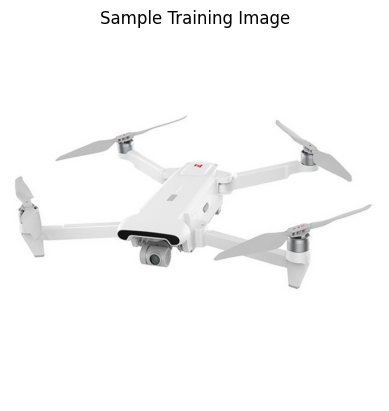

In [5]:
import matplotlib.pyplot as plt
import cv2

# Define the path to a sample training image
sample_train_image_path = '/content/gdrive/MyDrive/archive/drone_dataset/train/images'
train_image_files = os.listdir(sample_train_image_path)
sample_image_path = os.path.join(sample_train_image_path, train_image_files[0])

# Read and display the sample image
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Sample Training Image')
plt.axis('off')
plt.show()


#Display a Sample Label

In [6]:
# Define the path to a sample training label
sample_train_label_path = '/content/gdrive/MyDrive/archive/drone_dataset/train/labels'
train_label_files = os.listdir(sample_train_label_path)
sample_label_path = os.path.join(sample_train_label_path, train_label_files[0])

# Read and display the content of the sample label file
with open(sample_label_path, 'r') as file:
    label_content = file.read()
print(f"Training label content for {train_label_files[0]}:\n{label_content}")


Training label content for pic_048.txt:
0 0.493 0.487 0.956 0.398



#Verify the Label Format

In [7]:
# Check the content of the sample label file
with open(sample_label_path, 'r') as file:
    label_content = file.readlines()

print("Sample label file content:")
for line in label_content:
    print(line.strip())

# Ensure the format is correct
for line in label_content:
    values = line.strip().split()
    if len(values) != 5:
        print(f"Incorrect format: {line.strip()}")
    else:
        class_id, center_x, center_y, width, height = map(float, values)
        if not (0 <= center_x <= 1 and 0 <= center_y <= 1 and 0 <= width <= 1 and 0 <= height <= 1):
            print(f"Values out of range: {line.strip()}")


Sample label file content:
0 0.493 0.487 0.956 0.398


#Load and Display the YAML File

In [8]:
import yaml

# Define the path to the data.yaml file
data_yaml_path = '/content/gdrive/MyDrive/archive/drone_dataset/data.yaml'

# Load and display the content of the data.yaml file
with open(data_yaml_path, 'r') as file:
    data_yaml_content = yaml.safe_load(file)

print("Content of data.yaml:")
print(data_yaml_content)


Content of data.yaml:
{'names': ['drone'], 'nc': 1, 'path': '/drone_dataset/', 'train': '/drone_dataset/train', 'val': '/drone_dataset/valid'}


#Correct the data.yml file according to the path

In [9]:
import yaml

# Define the corrected content for the data.yaml file
correct_data_yaml = {
    'train': '/content/gdrive/MyDrive/archive/drone_dataset/train/images',
    'val': '/content/gdrive/MyDrive/archive/drone_dataset/valid/images',
    'nc': 1,
    'names': ['drone']
}

# Save the corrected content to the data.yaml file
data_yaml_path = '/content/gdrive/MyDrive/archive/drone_dataset/data.yaml'
with open(data_yaml_path, 'w') as file:
    yaml.dump(correct_data_yaml, file)

print("Corrected data.yaml file content:")
print(correct_data_yaml)


Corrected data.yaml file content:
{'train': '/content/gdrive/MyDrive/archive/drone_dataset/train/images', 'val': '/content/gdrive/MyDrive/archive/drone_dataset/valid/images', 'nc': 1, 'names': ['drone']}


#Task 2: Drone Object Detection (40 points)
You need to research can use any dataset that can be used to detect the class drone such as the drones used for the test videos. Please be careful to distinguish between the datasets that detect objects from drones to datasets that detect the drones. Your object detector must use a deep learning model but you can use an existing object detector model architecture.

Split the videos into frames and use each frame to present the drone detections you got. Store all images that you had detections in a folder called detections. Write your code in such a way that a number of videos can be processed from a directory and not just these two.

#Install Required Libraries

In [10]:
# Check GPU information
!nvidia-smi

# Install the specific version of Ultralytics
!pip install ultralytics==8.0.28

from ultralytics import YOLO
import ultralytics

# Run checks to verify the installation
ultralytics.checks()


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 31.0/201.2 GB disk)


# Training

**Optimizer and Loss Function:**

YOLOv8 typically uses the Adam optimizer with default parameters for training.

For the loss function, YOLOv8 generally uses a combination of object detection losses like confidence loss (BCE) and localization loss (MSE).

**Hyperparameter Optimization:**

Learning Rate: Experiment with different learning rates (e.g., using a learning rate scheduler) to find the optimal rate for faster convergence without overfitting.
Batch Size: Adjust the batch size to balance training speed and GPU memory usage. Larger batches can sometimes speed up training, but too large can degrade performance.
Image Size (imgsz): Increase or decrease the image size (imgsz) in the training configuration (data.yaml) to trade off between detection accuracy and speed.
Model Architecture:



In [12]:
# Fine-tune the YOLOv8 model with specified data and settings
!yolo task=detect mode=train model=yolov8s.pt data=/content/gdrive/MyDrive/archive/drone_dataset/data.yaml epochs=1 lr0=0.001  imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 241MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/gdrive/MyDrive/archive/drone_dataset/data.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize

In [13]:
import os

# Define the path where the YOLOv8 training results are saved
training_results_path = 'runs/detect/train'

# List contents of the directory
print(os.listdir(training_results_path))

['val_batch0_pred.jpg', 'PR_curve.png', 'F1_curve.png', 'results.csv', 'confusion_matrix.png', 'weights', 'val_batch1_labels.jpg', 'P_curve.png', 'events.out.tfevents.1720726571.ed98d46e8f72.11120.0', 'val_batch2_pred.jpg', 'R_curve.png', 'args.yaml', 'train_batch2.jpg', 'train_batch0.jpg', 'results.png', 'val_batch2_labels.jpg', 'train_batch1.jpg', 'val_batch0_labels.jpg', 'val_batch1_pred.jpg']


Images:

train_batch*.jpg: These are likely visualizations of training batches during the training process.
val_batch*.jpg: Similar to above, but for validation batches.
Plots:

F1_curve.png, P_curve.png, PR_curve.png, R_curve.png: These are different evaluation metric curves (F1, Precision, Recall, Precision-Recall).
Results:

results.png, results.csv: These files typically contain summarized results or visualizations of the training/validation performance.
confusion_matrix.png: This could be a confusion matrix showing the model's performance on different classes.
Events and Configuration:

events.out.tfevents.*: These are TensorFlow events files, which can be used with tools like TensorBoard for visualization and analysis.
args.yaml: Configuration file containing training arguments/settings.
Weights:

weights/: This directory likely contains the trained model weights (best.pt, last.pt) and possibly other checkpoint files.

#Load the Model

In [7]:
from ultralytics import YOLO

# Define the path to the best model weights
model_path = 'runs/detect/train/weights/best.pt'

# Load the model
model = YOLO(model_path)

#Perform Real-Time Drone Detection

In [11]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model_path = '/content/yolov8s.pt'

# Load the model
model = YOLO(model_path)

# Specify the paths to the downloaded videos
# Paths to downloaded videos
video_paths = [
    "/content/VideosDrone Tracking 1.mp4",
    "/content/VideosDrone tracking 2.mp4"
]


# Perform real-time drone detection on each video
for video_path in video_paths:
    try:
        # Run inference on the video and save the results
        results = model(video_path, save=True)
        print(f"Detection results saved for {video_path}")
    except Exception as e:
        print(f"Error processing {video_path}: {str(e)}")

print('Real-Time Detection Completed!')

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

video 1/1 (1/4941) /content/VideosDrone Tracking 1.mp4: 384x640 1 airplane, 26.6ms
video 1/1 (2/4941) /content/VideosDrone Tracking 1.mp4: 384x640 1 airplane, 7.5ms
video 1/1 (3/4941) /content/VideosDrone Tracking 1.mp4: 384x640 1 airplane, 7.1ms
video 1/1 (4/4941) /content/VideosDrone Tracking 1.mp4: 384x640 1 airplane, 7.6ms
video 1/1 (5/4941) /content/VideosDrone Tracking 1.mp4: 384x640 1 airplane, 7.0ms
video 1/1 (6/4941) /content/VideosDrone Tracking 1.mp4: 384x640 1 airplane, 7.2ms
video 1/1 (7/4941) /content/VideosDrone Tracking 1.mp4: 384x640 1 airplane, 8.3ms
video 1/1 (8/4941) /content/VideosDrone Tracking 1.mp4: 384x640 1 airplane, 7.3ms
video 1/1 (9/4941) /content/VideosDrone Tracking 1.mp4: 384x640 1 airplane, 7.1ms
video 1/1 (10/4941) /content/VideosDrone Tracking 1.mp4: 384x640 1 airplane, 7.2ms
video 

Detection results saved for /content/VideosDrone Tracking 1.mp4


Streaming output truncated to the last 5000 lines.
video 1/1 (10412/15409) /content/VideosDrone tracking 2.mp4: 384x640 7.5ms
video 1/1 (10413/15409) /content/VideosDrone tracking 2.mp4: 384x640 7.3ms
video 1/1 (10414/15409) /content/VideosDrone tracking 2.mp4: 384x640 7.6ms
video 1/1 (10415/15409) /content/VideosDrone tracking 2.mp4: 384x640 8.0ms
video 1/1 (10416/15409) /content/VideosDrone tracking 2.mp4: 384x640 9.5ms
video 1/1 (10417/15409) /content/VideosDrone tracking 2.mp4: 384x640 8.8ms
video 1/1 (10418/15409) /content/VideosDrone tracking 2.mp4: 384x640 9.4ms
video 1/1 (10419/15409) /content/VideosDrone tracking 2.mp4: 384x640 8.4ms
video 1/1 (10420/15409) /content/VideosDrone tracking 2.mp4: 384x640 10.9ms
video 1/1 (10421/15409) /content/VideosDrone tracking 2.mp4: 384x640 8.1ms
video 1/1 (10422/15409) /content/VideosDrone tracking 2.mp4: 384x640 7.6ms
video 1/1 (10423/15409) /content/VideosDrone tracking 2.mp4: 384x640 8.1ms
video 1/1 (10424/15409) /content/VideosDrone tra

Detection results saved for /content/VideosDrone tracking 2.mp4
Real-Time Detection Completed!


# Result Interpretation

The detection results include information such as bounding boxes around detected objects (in this case, drones), confidence scores for each detection, and potentially class labels.

These results are typically stored in a structured format that allows post-processing and visualization.

The code saves the detection results into a directory specified by the YOLOv8 model (runs/detect/predict in this case).

#Extract frames from .mp4 files





In [13]:
import cv2
import os

# Function to extract frames from a video
def extract_frames(video_path, output_dir):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video opened successfully
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        return

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Save frame as JPEG file
        frame_path = os.path.join(output_dir, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_path, frame)

        frame_count += 1

    # Release resources
    cap.release()
    print(f"Frames extracted to {output_dir}")

# Directory containing the videos
videos_directory = '/content/runs/detect/predict2/'

# List of video files
video_files = [
    '/content/runs/detect/predict2/VideosDrone Tracking 1.mp4',
    '/content/runs/detect/predict2/VideosDrone tracking 2.mp4'
]

# Extract frames from each video
for video_file in video_files:
    video_path = os.path.join(videos_directory, video_file)
    output_directory = os.path.join(videos_directory, f"{video_file.split('.')[0]}_frames")

    # Extract frames from the video
    extract_frames(video_path, output_directory)



Frames extracted to /content/runs/detect/predict2/VideosDrone Tracking 1_frames
Frames extracted to /content/runs/detect/predict2/VideosDrone tracking 2_frames


#display some frames from the .mp4 files





#first video

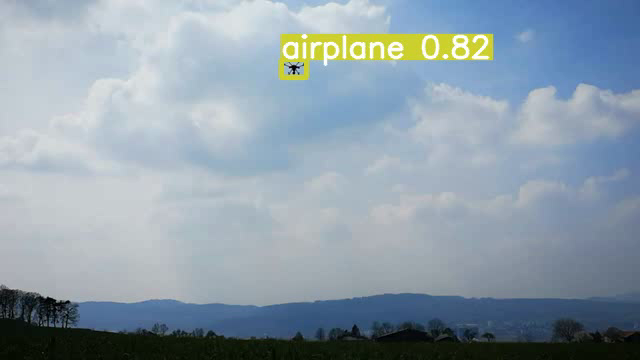

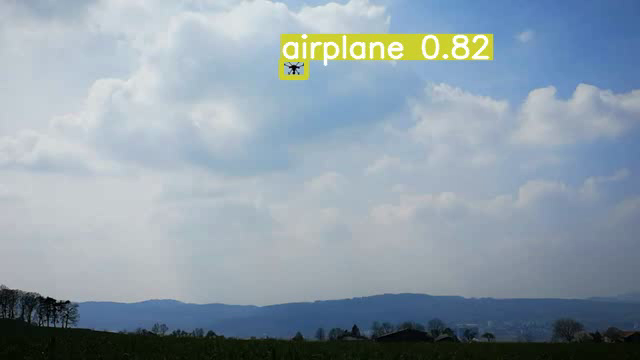

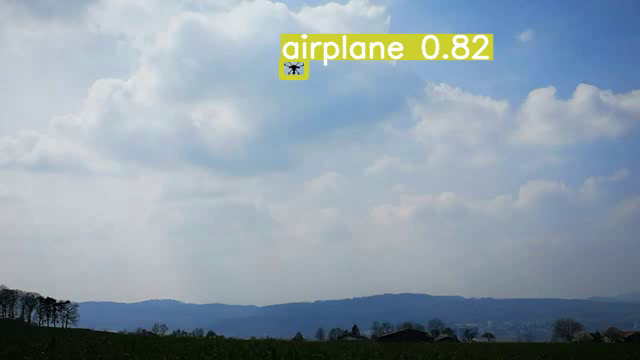

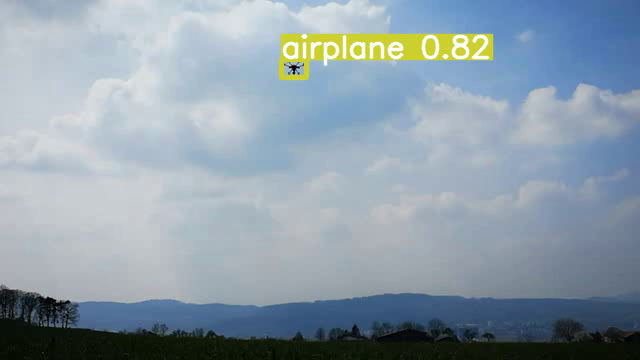

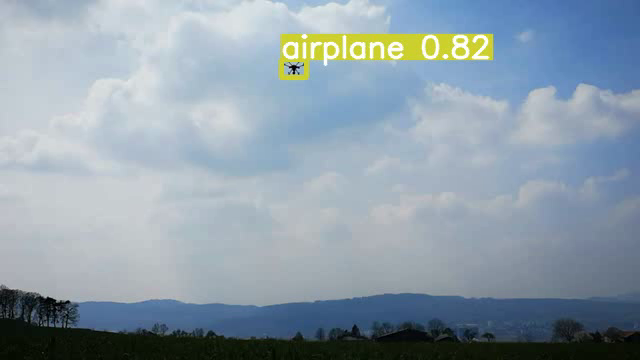

In [14]:
import os
import cv2
from google.colab.patches import cv2_imshow

# Path to the directory containing saved frames with detections
detections_dir = "/content/runs/detect/predict2/"

# List of video files
video_files = [
    '/content/runs/detect/predict2/VideosDrone Tracking 1.mp4',
    #'/content/runs/detect/predict/VideosDrone tracking 2.mp4'
]

# Display frames from each video
for video_file in video_files:
    video_path = os.path.join(detections_dir, video_file)

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video opened successfully
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        continue

    frame_count = 0
    num_frames_to_display = 5  # Number of frames to display per video

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Display the frame
        cv2_imshow(frame)

        frame_count += 1
        if frame_count >= num_frames_to_display:
            break

    # Release resources
    cap.release()


#second video

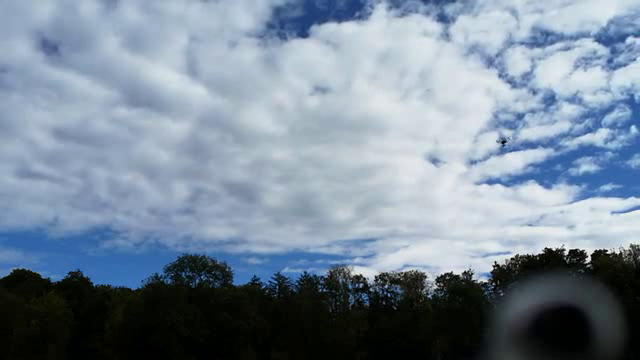

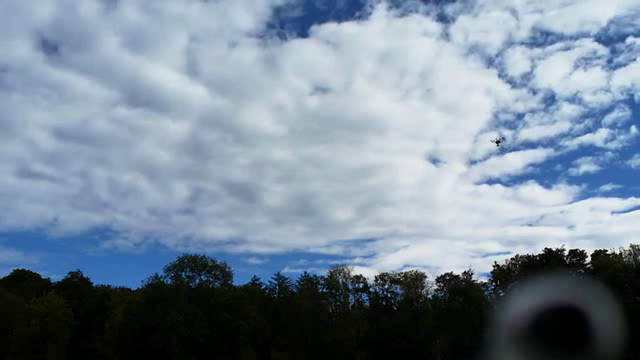

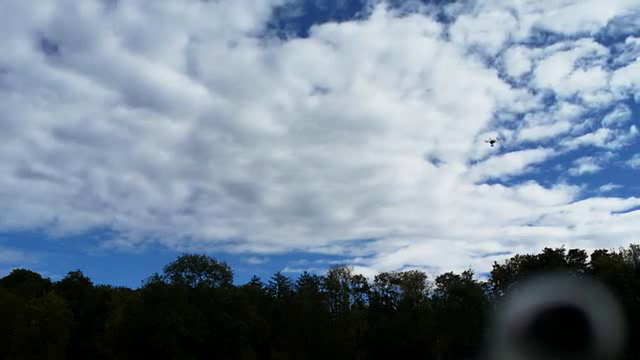

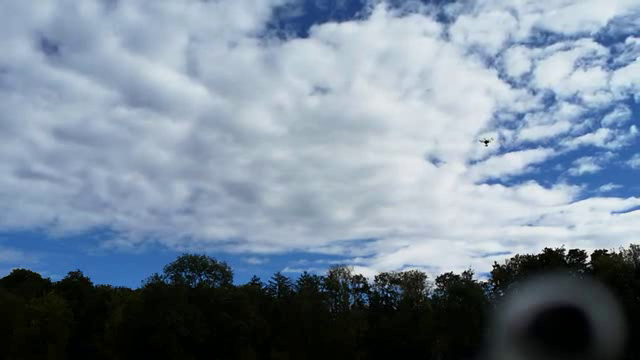

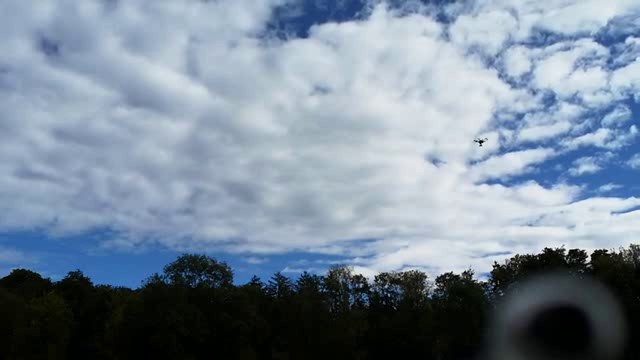

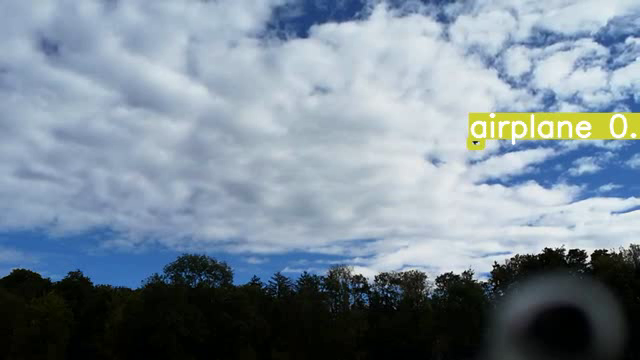

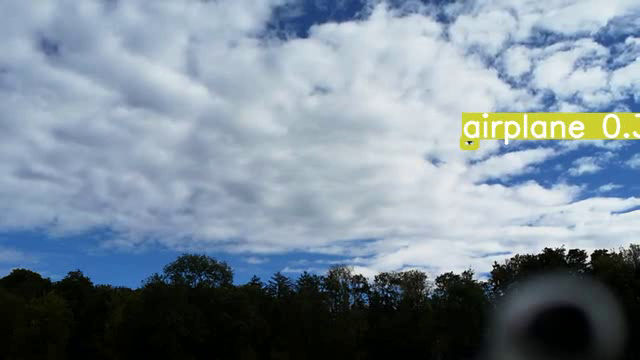

In [31]:
import os
import cv2
from google.colab.patches import cv2_imshow

# Path to the directory containing saved frames with detections
detections_dir = "/content/runs/detect/predict2/"

# Video file to process
video_file = '/content/runs/detect/predict2/VideosDrone tracking 2.mp4'

# Full path to the video file
video_path = os.path.join(detections_dir, video_file)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print(f"Error opening video file: {video_path}")
else:
    # Seek to frame 2180
    cap.set(cv2.CAP_PROP_POS_FRAMES, 2180)

    # Display frames from frame 2180 to frame 2190
    start_frame = 2184
    end_frame = 2190

    for frame_count in range(start_frame, end_frame + 1):
        ret, frame = cap.read()
        if not ret:
            break

        # Display the frame
        cv2_imshow(frame)

    # Release resources
    cap.release()


#Write your code in such a way that a number of videos can be processed from a directory and not just these two.

In [ ]:
import os
from glob import glob
from ultralytics import YOLO

# Define the path to the best model weights
model_path = 'runs/detect/train5/weights/best.pt'

# Load the model
model = YOLO(model_path)

# Directory containing the videos
videos_directory = '/content/videos/'

# Get all video files in the directory
video_paths = glob(os.path.join(videos_directory, '*.mp4'))

# Perform real-time drone detection on each video
for video_path in video_paths:
    try:
        # Run inference on the video and save the results
        results = model(video_path, save=True)
        print(f"Detection results saved for {video_path}")
    except Exception as e:
        print(f"Error processing {video_path}: {str(e)}")

print('Real-Time Detection Completed!')




#Task 1: Setup your development environment and store the test videos locally (10 points)

#Download videos and extract frames

In [1]:
!pip install yt-dlp
!pip install opencv-python
!pip install numpy
!pip uninstall -y opencv-python-headless
!pip install opencv-python-headless

Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 34.7 MB/s eta 0:00:00


In [2]:
from yt_dlp import YoutubeDL

SAVE_PATH = "/content/Videos"

links = [
    "https://www.youtube.com/watch?v=YrydHPwRelI&t=438s",
    "https://www.youtube.com/watch?v=DhmZ6W1UAv4&t=43s"
]

ydl_opts = {
    'format': 'mp4',
    'outtmpl': SAVE_PATH + '%(title)s.%(ext)s',
}

with YoutubeDL(ydl_opts) as ydl:
    for link in links:
        try:
            ydl.download([link])
            print(f"Video downloaded successfully: {link}")
        except Exception as e:
            print(f"Download Error for {link}: {str(e)}")

print('Task Completed!')


[youtube] Extracting URL: https://www.youtube.com/watch?v=YrydHPwRelI&t=438s
[youtube] YrydHPwRelI: Downloading webpage
[youtube] YrydHPwRelI: Downloading ios player API JSON
[youtube] YrydHPwRelI: Downloading player 8d9f6215
[youtube] YrydHPwRelI: Downloading m3u8 information
[info] YrydHPwRelI: Downloading 1 format(s): 18
[download] Destination: /content/VideosDrone tracking 2.mp4
[download] 100% of   11.84MiB in 00:00:01 at 11.42MiB/s  
Video downloaded successfully: https://www.youtube.com/watch?v=YrydHPwRelI&t=438s
[youtube] Extracting URL: https://www.youtube.com/watch?v=DhmZ6W1UAv4&t=43s
[youtube] DhmZ6W1UAv4: Downloading webpage
[youtube] DhmZ6W1UAv4: Downloading ios player API JSON
[youtube] DhmZ6W1UAv4: Downloading m3u8 information
[info] DhmZ6W1UAv4: Downloading 1 format(s): 18
[download] Destination: /content/VideosDrone Tracking 1.mp4
[download] 100% of    3.08MiB in 00:00:00 at 6.23MiB/s   
Video downloaded successfully: https://www.youtube.com/watch?v=DhmZ6W1UAv4&t=43s
T

#Frames extraction

In [3]:
import cv2
import os

# Directory to save frames
frame_save_path = "/content/frames/"
os.makedirs(frame_save_path, exist_ok=True)

# Paths to downloaded videos
video_paths = [
    "/content/VideosDrone Tracking 1.mp4",
    "/content/VideosDrone tracking 2.mp4"
]

for video_path in video_paths:
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    # Initialize frame count
    frame_count = 0

    while True:
        # Read the next frame
        success, frame = video_capture.read()

        if not success:
            break

        # Save frame as JPEG file
        frame_filename = f"{os.path.splitext(os.path.basename(video_path))[0]}_{frame_count}.jpg"
        frame_filepath = os.path.join(frame_save_path, frame_filename)
        cv2.imwrite(frame_filepath, frame)

        frame_count += 1

    # Release the VideoCapture object
    video_capture.release()

print("Frames extraction completed.")


Frames extraction completed.


#Process the videos

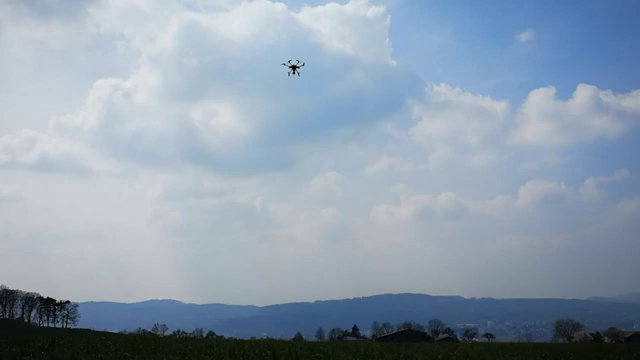

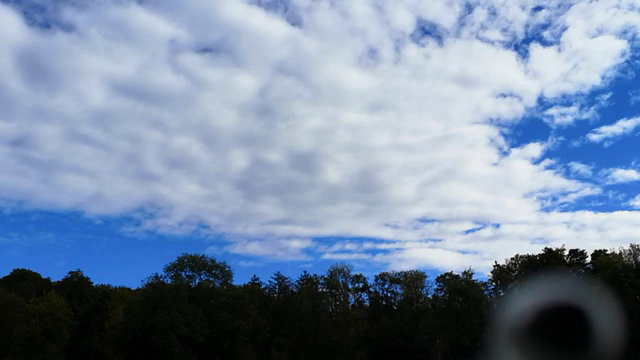

Press 'q' to quit: q


In [5]:
import cv2
from google.colab.patches import cv2_imshow

# Path to the downloaded videos in Google Colab
video_path1 = "/content/VideosDrone Tracking 1.mp4"
video_path2 = "/content/VideosDrone tracking 2.mp4"

# Open the video files
cap1 = cv2.VideoCapture(video_path1)
cap2 = cv2.VideoCapture(video_path2)

# Check if videos opened successfully
if not cap1.isOpened() or not cap2.isOpened():
    print("Error opening video files.")
else:
    # Process each frame of the videos
    while True:
        # Read frames
        ret1, frame1 = cap1.read()
        ret2, frame2 = cap2.read()

        # Break the loop if no frames are read
        if not ret1 or not ret2:
            break

        # Display frames (you can also perform processing here)
        cv2_imshow(frame1)
        cv2_imshow(frame2)

        # Simulate 'q' key press to exit loop (since cv2.waitKey() is not usable)
        try:
            if input("Press 'q' to quit: ").strip().lower() == 'q':
                break
        except KeyboardInterrupt:
            break

    # Release the video capture objects
    cap1.release()
    cap2.release()



#Step 1: Split Videos into Frames

In [6]:
import cv2
import os

# Create a directory to store detection results
detections_dir = "/content/detections"
os.makedirs(detections_dir, exist_ok=True)

# Function to process each video and detect drones
def detect_drones(video_path, detections_dir):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video opened successfully
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        return

    # Initialize the frame counter
    frame_count = 0

    # Process each frame
    while True:
        # Read the next frame
        ret, frame = cap.read()

        # If frame is not read successfully, break the loop
        if not ret:
            break

        # TODO: Perform drone detection on 'frame' using a deep learning model

        # For now, let's save each frame to the detections directory
        frame_filename = os.path.join(detections_dir, f"frame_{frame_count}.jpg")
        cv2.imwrite(frame_filename, frame)
        print(f"Saved frame {frame_count}")

        # Increment frame count
        frame_count += 1

    # Release the video capture object
    cap.release()

# Process each video
detect_drones(video_path1, detections_dir)
detect_drones(video_path2, detections_dir)

print("Video processing complete.")


Streaming output truncated to the last 5000 lines.
Saved frame 10410
Saved frame 10411
Saved frame 10412
Saved frame 10413
Saved frame 10414
Saved frame 10415
Saved frame 10416
Saved frame 10417
Saved frame 10418
Saved frame 10419
Saved frame 10420
Saved frame 10421
Saved frame 10422
Saved frame 10423
Saved frame 10424
Saved frame 10425
Saved frame 10426
Saved frame 10427
Saved frame 10428
Saved frame 10429
Saved frame 10430
Saved frame 10431
Saved frame 10432
Saved frame 10433
Saved frame 10434
Saved frame 10435
Saved frame 10436
Saved frame 10437
Saved frame 10438
Saved frame 10439
Saved frame 10440
Saved frame 10441
Saved frame 10442
Saved frame 10443
Saved frame 10444
Saved frame 10445
Saved frame 10446
Saved frame 10447
Saved frame 10448
Saved frame 10449
Saved frame 10450
Saved frame 10451
Saved frame 10452
Saved frame 10453
Saved frame 10454
Saved frame 10455
Saved frame 10456
Saved frame 10457
Saved frame 10458
Saved frame 10459
Saved frame 10460
Saved frame 10461
Saved frame 1

**#Task 3: Kalman Filter (50 points)**
Use the `filterpy`` library to implement a Kalman filter that will track the drone in the video. You will need to use the detections from the previous task to initialize the Kalman filter.

You need to deliver a number of short videos with each video containing only the frames where the drone is present in the test video and its 2D trajectory shown as a line that connects the pixels that the tracker indicated. You can use the ffmpeg command line tool and OpenCV to superpose the bounding box of the drone on the video as well as plot its trajectory.

In [16]:
!pip install filterpy opencv-python-headless ffmpeg-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=c199b30cd4fe0b0593ab0ce993b220b4c1ef145e128e2ed7d00641e565797ba3
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


#Step 1: Import Necessary Libraries
cv2 for video processing, filterpy for Kalman Filter implementation, and numpy for numerical operations.

In [17]:
import cv2
from filterpy.kalman import KalmanFilter
import numpy as np

#Step 2: Initialize Kalman Filter
Define a function initialize_kalman_filter() to initialize the Kalman Filter with the initial detection coordinates of the drone. This function sets up the Kalman Filter parameters such as state transition matrix, measurement function, and noise covariances.

Adjusting process noise (Q matrix in Kalman Filter) involves understanding the characteristics of the motion of the object being tracked, in this case, the drone. The process noise represents the uncertainty in the dynamics of the system being modeled by the Kalman Filter.

**approach to adjust Q based on my data:**
**Calculate Covariance:** Use the observed differences (dx, dy, ddx, ddy) to estimate the covariance of the process noise. Covariance matrices are often diagonal (Q = np.diag([q_x, q_y, q_vx, q_vy])), where q_x, q_y are position noise variances and q_vx, q_vy are velocity noise variances.

#Step 2: Process Frames and Update Kalman Filter
Now, we'll process each frame, update the Kalman Filter with the detected drone's position, and store the filtered states.

In [34]:
import cv2
import os
import numpy as np
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

# Define video paths
video_path1 = "/content/VideosDrone Tracking 1.mp4"
video_path2 = "/content/VideosDrone tracking 2.mp4"

# Path to the directory containing saved frames with detections
detections_dir = "/content/detections"



# Function to load frames from detections directory
def load_frames(detections_dir):
    frames = []
    for filename in os.listdir(detections_dir):
        if filename.endswith(".jpg"):
            frame_path = os.path.join(detections_dir, filename)
            frame = cv2.imread(frame_path)
            frames.append(frame)
    return frames

# Load frames from detections directory
frames = load_frames(detections_dir)

# Initialize Kalman Filter
kf = KalmanFilter(dim_x=4, dim_z=2)  # 4-dimensional state (x, y, dx, dy), 2-dimensional measurement (x, y)

# Extract initial state from the first frame
initial_detection = frames[0]  # Use the first frame for initialization
x, y, w, h = 100, 100, 50, 50  # Example coordinates from drone detection, adjust as per your detection results
initial_state = [x + w / 2, y + h / 2, 0, 0]  # Assuming initial velocity is 0, using center coordinates

# Define initial uncertainty (covariance)
kf.x = np.array(initial_state)
kf.P *= 10  # Initial uncertainty

# Define motion model (transition matrix)
dt = 1.0  # Time step between measurements
kf.F = np.array([[1, 0, dt, 0],
                 [0, 1, 0, dt],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]])

# Define measurement function (observation matrix)
kf.H = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0]])

# Define measurement uncertainty (measurement noise covariance)
kf.R *= 5  # Measurement noise

# Define process noise (motion noise covariance)
kf.Q = Q_discrete_white_noise(dim=4, dt=dt, var=0.1)

# Initialize a list to store predicted and filtered state estimates
filtered_states = []

# Process frames and update Kalman Filter
for frame in frames:
    # Perform drone detection on 'frame' to get bounding box coordinates (x, y, w, h)
    # For example, assuming you have the bounding box coordinates:
    x, y, w, h = 200, 150, 60, 60  # Replace with actual coordinates from detection

    # Get the center coordinates (x, y) of the detected drone
    measurement = np.array([x + w / 2, y + h / 2])

    # Update the Kalman Filter with the measurement
    kf.predict()
    kf.update(measurement)

    # Store the filtered state estimates (x, y)
    filtered_states.append((kf.x[0], kf.x[1]))

# Now 'filtered_states' contains the filtered (smoothed) coordinates of the drone over time
print("Kalman Filter processing complete.")

Kalman Filter processing complete.


**Step 3: Visualize Trajectory and Save Results**
Step 3: Visualizing the trajectory of the drone and saving the results.

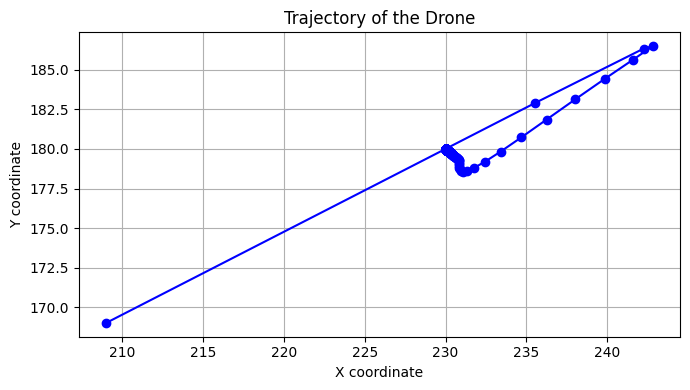

In [36]:
import matplotlib.pyplot as plt

# Extract x and y coordinates from filtered_states
x_coords = [state[0] for state in filtered_states]
y_coords = [state[1] for state in filtered_states]

# Plotting the trajectory
plt.figure(figsize=(7, 4))
plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b')
plt.title('Trajectory of the Drone')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(True)
plt.tight_layout()

# Save the plot as an image
plt.savefig('/content/drone_trajectory.png')
plt.show()


#Saving Trajectory Data:

In [37]:
import csv

# Define the file path for saving CSV
csv_file = '/content/drone_trajectory.csv'

# Save filtered_states as CSV
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['X', 'Y'])  # Write header
    for state in filtered_states:
        writer.writerow([state[0], state[1]])
print("Trajectory data saved to:", csv_file)


Trajectory data saved to: /content/drone_trajectory.csv


In [38]:
!ls /content

 detections	        gdrive			     'VideosDrone Tracking 1_trajectory.mp4'
 drone_trajectory.csv   runs			     'VideosDrone tracking 2.mp4'
 drone_trajectory.png   tracked_frames		     'VideosDrone tracking 2_trajectory.mp4'
 frames		       'VideosDrone Tracking 1.mp4'   yolov8s.pt


In [39]:
import pandas as pd

# Path to your CSV file
csv_file_path = '/content/drone_trajectory.csv'

# Read CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the head of the DataFrame
print("Head of CSV File:")
print(df.head())


Head of CSV File:
            X           Y
0  209.005993  169.017980
1  235.529578  182.893475
2  242.263295  186.336592
3  242.817214  186.486016
4  241.612767  185.640825


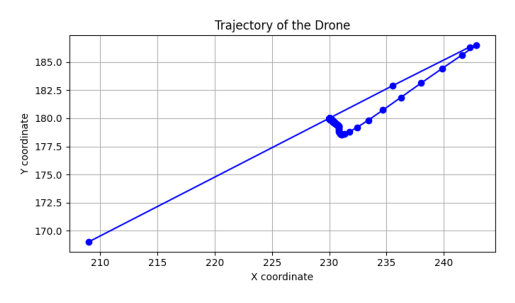

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your PNG file
png_file_path = '/content/drone_trajectory.png'

# Display the PNG file
img = mpimg.imread(png_file_path)
plt.imshow(img)
plt.axis('off')  # Optional: turn off axis labels
plt.show()


**Deliverables for Task 2:**

You need to deliver short videos where the drone is present, showing its 2D trajectory as a line connecting the positions indicated by the Kalman Filter.
These videos should overlay the bounding box of the drone on each frame and plot its trajectory.

In [44]:
import cv2
import os
from filterpy.kalman import KalmanFilter
import numpy as np

# Initialize Kalman filter
def init_kalman_filter(initial_state):
    kalman = KalmanFilter(dim_x=4, dim_z=2)
    kalman.x = initial_state
    kalman.F = np.array([[1, 0, 1, 0],
                         [0, 1, 0, 1],
                         [0, 0, 1, 0],
                         [0, 0, 0, 1]])
    kalman.H = np.array([[1, 0, 0, 0],
                         [0, 1, 0, 0]])
    kalman.P *= 1000.
    kalman.R = 5.  # Measurement noise
    kalman.Q = np.diag([0.01, 0.01, 0.01, 0.01])  # Process noise

    return kalman

# Function to extract bounding box from detection image
def get_bounding_box(detection_image):
    # Convert the detection image to grayscale (if necessary)
    gray = cv2.cvtColor(detection_image, cv2.COLOR_BGR2GRAY)

    # Apply a threshold or any other segmentation technique
    _, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assume the largest contour corresponds to the drone detection
    if contours:
        # Get the bounding box coordinates
        x, y, w, h = cv2.boundingRect(contours[0])
        return [x, y, w, h]

    # Return None if no contours found (no detection)
    return None

# Function to track drone using Kalman filter and save processed frames
def track_drone(video_path, detections_dir, output_dir):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0

    kalman = None
    prev_measurement = None

    # Store trajectory points
    trajectory_points = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        detection_file = os.path.join(detections_dir, f"frame_{frame_count:04d}.jpg")
        if os.path.exists(detection_file):
            detection = cv2.imread(detection_file)
            bbox = get_bounding_box(detection)  # Implement function to get bounding box
            measurement = np.array([bbox[0] + bbox[2] / 2, bbox[1] + bbox[3] / 2])

            if kalman is None:
                kalman = init_kalman_filter(np.array([measurement[0], measurement[1], 0, 0]))
            else:
                kalman.predict()
                kalman.update(measurement)

            # Get predicted state
            predicted_state = kalman.x[:2].astype(int)
            trajectory_points.append(tuple(predicted_state))

            # Draw predicted position on frame
            cv2.circle(frame, (predicted_state[0], predicted_state[1]), 5, (0, 255, 0), -1)
            cv2.putText(frame, f"Predicted: ({predicted_state[0]}, {predicted_state[1]})", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # Save frame with overlay
            output_path = os.path.join(output_dir, f"tracked_frame_{frame_count:04d}.jpg")
            cv2.imwrite(output_path, frame)

        frame_count += 1

    cap.release()
    print(f"Tracking completed. Frames saved to {output_dir}")

    return trajectory_points

# Function to create video with trajectory
def create_trajectory_video(video_path, trajectory_points, output_video_path):
    cap = cv2.VideoCapture(video_path)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    # Iterate over each frame and draw trajectory
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count < len(trajectory_points):
            # Draw trajectory up to current frame
            cv2.polylines(frame, [np.array(trajectory_points[:frame_count+1], dtype=np.int32)], False, (255, 0, 0), thickness=2)

        # Write the frame into the file 'output_video_path'
        out.write(frame)

        frame_count += 1

    # Release everything if job is finished
    cap.release()
    out.release()
    print(f"Video with trajectory saved to: {output_video_path}")

# Example video paths
video_paths = [
    "/content/VideosDrone Tracking 1.mp4",
    "/content/VideosDrone tracking 2.mp4"
]

# Process each video
for video_path in video_paths:
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    detections_dir = os.path.join("/content/detections", video_name)
    output_dir = os.path.join("/content/tracked_frames", video_name)
    os.makedirs(detections_dir, exist_ok=True)
    os.makedirs(output_dir, exist_ok=True)

    # Extract frames from video and track drone
    trajectory_points = track_drone(video_path, detections_dir, output_dir)

    # Create video with trajectory
    output_video_path = f"/content/{video_name}_trajectory.mp4"
    create_trajectory_video(video_path, trajectory_points, output_video_path)

print("Task 2 Completed!")


Tracking completed. Frames saved to /content/tracked_frames/VideosDrone Tracking 1
Video with trajectory saved to: /content/VideosDrone Tracking 1_trajectory.mp4
Tracking completed. Frames saved to /content/tracked_frames/VideosDrone tracking 2
Video with trajectory saved to: /content/VideosDrone tracking 2_trajectory.mp4
Task 2 Completed!


The provided code extracts frames from videos, detects drones in each frame, and tracks the drone's movement using a Kalman filter. It saves the processed frames with predicted drone positions overlayed. This process is repeated for each video in the specified list, organizing the output in directories based on the video names.

In [41]:
import cv2
import os
from filterpy.kalman import KalmanFilter
import numpy as np

# Function to extract frames from a video
def extract_frames(video_path, output_dir):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0

    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        return

    os.makedirs(output_dir, exist_ok=True)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_path = os.path.join(output_dir, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_path, frame)

        frame_count += 1

    cap.release()
    print(f"Frames extracted to {output_dir}")

# Initialize Kalman filter
def init_kalman_filter(initial_state):
    kalman = KalmanFilter(dim_x=4, dim_z=2)
    kalman.x = initial_state
    kalman.F = np.array([[1, 0, 1, 0],
                         [0, 1, 0, 1],
                         [0, 0, 1, 0],
                         [0, 0, 0, 1]])
    kalman.H = np.array([[1, 0, 0, 0],
                         [0, 1, 0, 0]])
    kalman.P *= 1000.
    kalman.R = 5.  # Measurement noise
    kalman.Q = np.diag([0.01, 0.01, 0.01, 0.01])  # Process noise

    return kalman

# Function to extract bounding box from detection image
def get_bounding_box(detection_image):
    # Convert the detection image to grayscale (if necessary)
    gray = cv2.cvtColor(detection_image, cv2.COLOR_BGR2GRAY)

    # Apply a threshold or any other segmentation technique
    _, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assume the largest contour corresponds to the drone detection
    if contours:
        # Get the bounding box coordinates
        x, y, w, h = cv2.boundingRect(contours[0])
        return [x, y, w, h]

    # Return None if no contours found (no detection)
    return None

# Function to track drone using Kalman filter
def track_drone(video_path, detections_dir, output_dir):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0

    kalman = None
    prev_measurement = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        detection_file = os.path.join(detections_dir, f"frame_{frame_count:04d}.jpg")
        if os.path.exists(detection_file):
            detection = cv2.imread(detection_file)
            bbox = get_bounding_box(detection)  # Implement function to get bounding box
            measurement = np.array([bbox[0] + bbox[2] / 2, bbox[1] + bbox[3] / 2])

            if kalman is None:
                kalman = init_kalman_filter(np.array([measurement[0], measurement[1], 0, 0]))
            else:
                kalman.predict()
                kalman.update(measurement)

            # Get predicted state
            predicted_state = kalman.x[:2].astype(int)

            # Draw predicted position on frame
            cv2.circle(frame, (predicted_state[0], predicted_state[1]), 5, (0, 255, 0), -1)
            cv2.putText(frame, f"Predicted: ({predicted_state[0]}, {predicted_state[1]})", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # Save frame with overlay
            output_path = os.path.join(output_dir, f"tracked_frame_{frame_count:04d}.jpg")
            cv2.imwrite(output_path, frame)

        frame_count += 1

    cap.release()
    print(f"Tracking completed. Frames saved to {output_dir}")

# Example video paths
video_paths = [
    "/content/VideosDrone Tracking 1.mp4",
    "/content/VideosDrone tracking 2.mp4"
]

# Process each video
for video_path in video_paths:
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    detections_dir = os.path.join("/content/detections", video_name)
    output_dir = os.path.join("/content/tracked_frames", video_name)
    os.makedirs(detections_dir, exist_ok=True)
    os.makedirs(output_dir, exist_ok=True)

    # Extract frames from video
    extract_frames(video_path, detections_dir)

    # Track drone using Kalman filter and save processed frames
    track_drone(video_path, detections_dir, output_dir)

print("Task 2 Completed!")


Frames extracted to /content/detections/VideosDrone Tracking 1
Tracking completed. Frames saved to /content/tracked_frames/VideosDrone Tracking 1
Frames extracted to /content/detections/VideosDrone tracking 2
Tracking completed. Frames saved to /content/tracked_frames/VideosDrone tracking 2
Task 2 Completed!


#Visualization

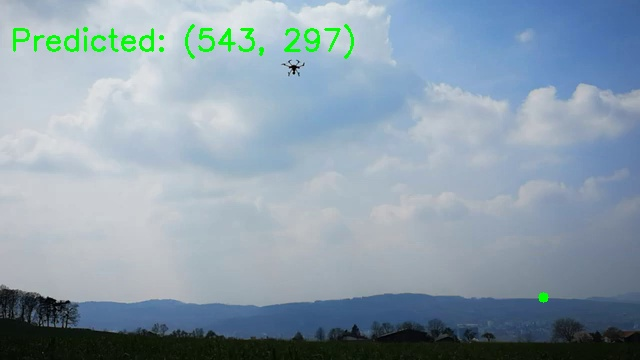

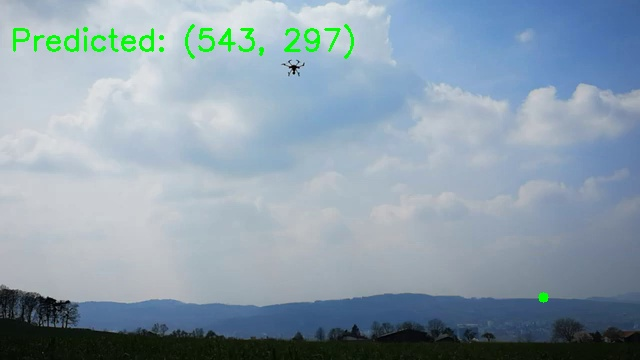

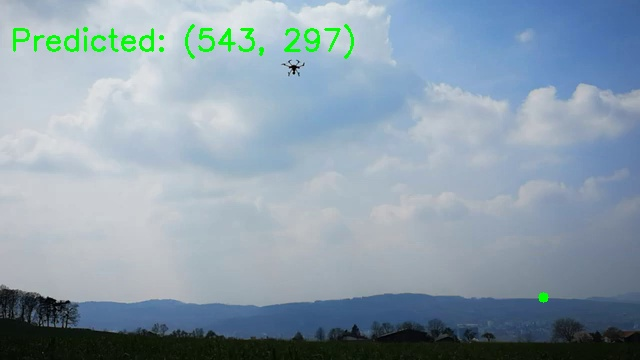

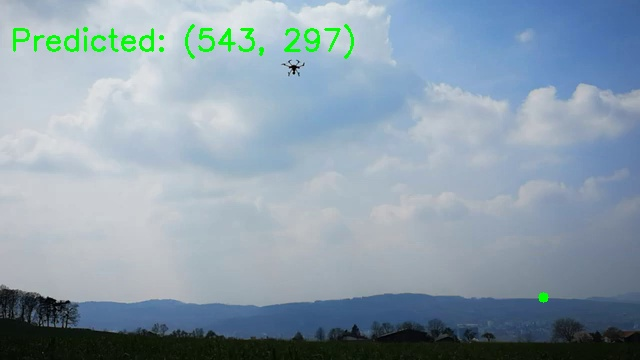

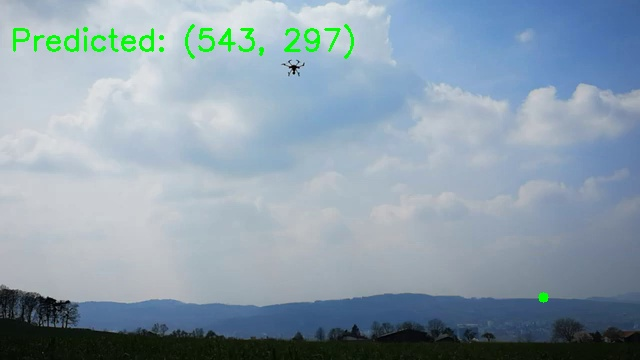

In [43]:
from google.colab.patches import cv2_imshow
import cv2
import os

# Function to visualize tracked frames
def visualize_tracked_frames(tracked_frames_dir, num_frames=5):
    frame_files = sorted(os.listdir(tracked_frames_dir))
    frame_files = [f for f in frame_files if f.endswith('.jpg')]

    for i in range(num_frames):
        frame_path = os.path.join(tracked_frames_dir, frame_files[i])
        frame = cv2.imread(frame_path)

        # Display the frame using cv2_imshow
        cv2_imshow(frame)

# Example usage to visualize frames
tracked_frames_dir = "/content/tracked_frames/VideosDrone Tracking 1"
visualize_tracked_frames(tracked_frames_dir, num_frames=5)
